##  Séries temporais 

### Dados da Bacia de Iguatu

Equipamento de aquisição MT1 da EMI 

Data de aquisição 2004

Arranjo em L

<h2 align="center">Importando Bibliotecas Importantes <h2> 

In [23]:
import numpy as np
import matplotlib.gridspec as gridspec
import glob
import pandas as pd
import math as math
import pylab
from matplotlib import pyplot as plt
import os
%matplotlib inline

<h2 align="center">  Importando o dado MT </h2> 

In [24]:
timeseries = glob.glob('*ts1.txt')

## Estação 001  | Band TS1 = 2Hz

In [25]:
timeseries

['04I0012_Ex-1ts1.txt',
 '04I0012_Ey-1ts1.txt',
 '04I0012_Hx-1ts1.txt',
 '04I0012_Hy-1ts1.txt',
 '04I0012_Hz-1ts1.txt']

In [26]:
Exr = np.genfromtxt(timeseries[0], skip_header=5000)
Eyr = np.genfromtxt(timeseries[1], skip_header=5000)
Hxr = np.genfromtxt(timeseries[2], skip_header=5000)
Hyr = np.genfromtxt(timeseries[3], skip_header=5000)
Hzr = np.genfromtxt(timeseries[4], skip_header=5000)

In [27]:
header=('Ex [mV]','Ey [mV]', 'Hx [mV]', 'Hy [mV]', 'Hz [mV]')

In [28]:
TSr = [Exr,Eyr,Hxr,Hyr,Hzr]

## Plot

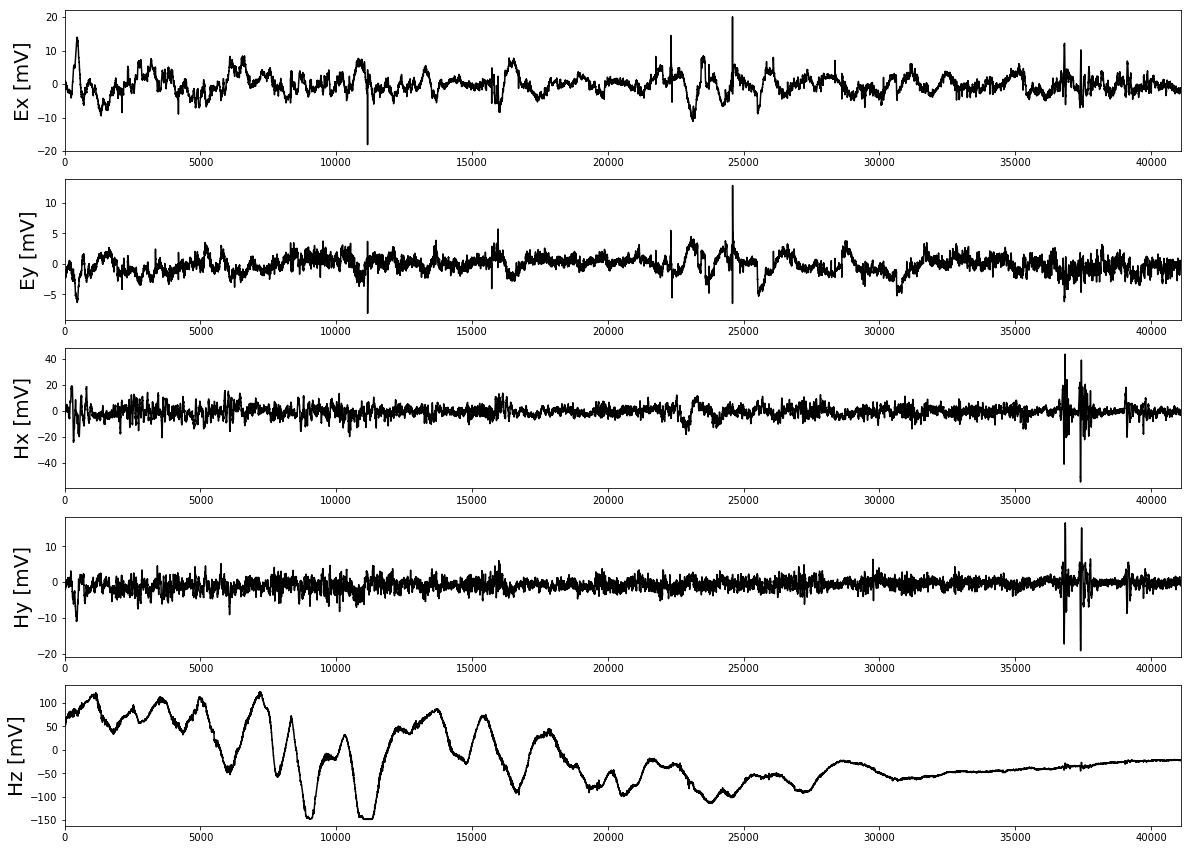

In [19]:
fig = plt.figure(figsize=(20,15))
gs1 = gridspec.GridSpec(len(TSr),1)

for i,j in enumerate(TSr):
    ax = fig.add_subplot(gs1[i])
    plt.ylabel(header[i], fontsize=20)
    #plt.xlabel('$t(s)$', fontsize=60)
    ax.plot(np.arange(len(TSr[i])),j,'k')
    ax.set_xlim(min(np.arange(len(TSr[i]))),max(np.arange(len(TSr[i]))))
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

fig.savefig('ig004_ts1_10_10.png', dpi=600)

<h2 align='center'> Calculating the spectre to Bx,By,Bz,En,Ee,Es,Ew component  (Discrete Fourier Transform http://docs.scipy.org/doc/numpy/reference/routines.fft.html)</h2>

<h5> Setting the HANNING window, which one maximizes the energy in the main lobe of the window relative to total energy. </h5>

In [30]:
N = len(TSr)
window = np.kaiser(N,6)
window = window/sum(np.convolve(window,window))

<h5> The spectrogram x-axis</h5>

In [31]:
SR = 1 
fr = (1/(SR*N))*(np.arange(N)/2)

<h5> Normalization of the component</h5>

In [33]:
component_data = []
for i,j in enumerate(TSr):
    component_data.append(j - np.mean(j))

<h5> Linear convolution between the component and the HANNING window</h5>

In [34]:
component_w = [np.convolve(i, window) for i in component_data]

<h5> One-dimensional discrete Fourier Transform of the previous convolution . </h5>

In [35]:
component_wf = [np.fft.fft(i) for i in component_w]

<h5> Linear convolution between the discrete Fourier Transform and his conjugate</h5>

In [36]:
perd = [np.convolve(i,np.conjugate(i)) for i in component_wf]

<h5> Smoothness window size </h5>

In [37]:
nsm = 13
smooth = np.ones(nsm)/nsm

<h5> Shift the convolution between the component and the smothness window to the center of the spectrum. </h5>

In [38]:
spectrum = [np.fft.fftshift(np.convolve(np.fft.fftshift(i),smooth)) for i in perd]

<h2 align='center'>Plotting the Spectrogram</h2>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


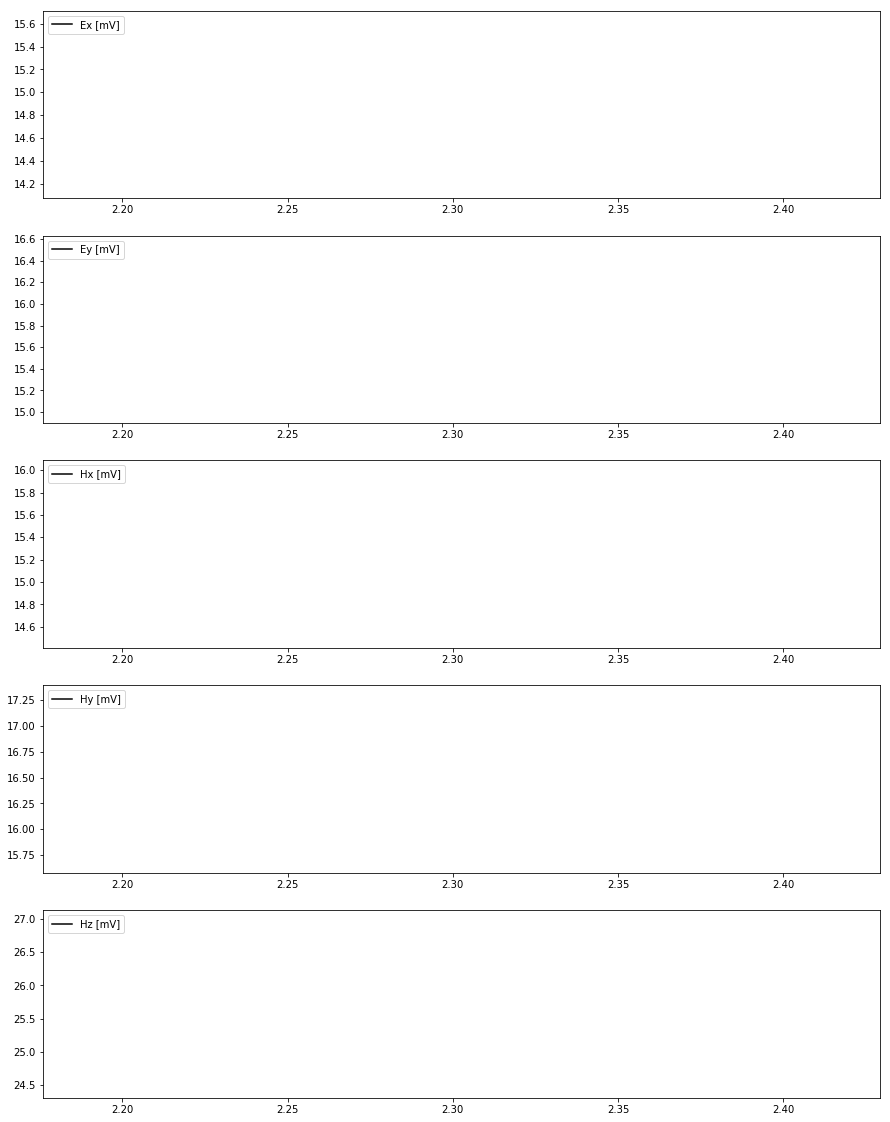

In [40]:
fig = plt.figure(figsize=(15,20))
gs1 = gridspec.GridSpec(len(spectrum),1)

for i,j in enumerate(spectrum):
    ax = fig.add_subplot(gs1[i])
    ax.plot(np.log(1/fr[:int(N/2)]),np.log(j[:int(N/2)]),'k',label=header[i])
    ax.legend(loc=2)